**例题（旅行商问题）.** 已知100个目标的经度、纬度如表17.1所示。我方有一个基地，经度和纬度为（70,40）。假设我方飞机的速度为1000公里/小时。我方派一架飞机从基地出发，侦察完所有目标，再返回原来的基地。在每一目标点的侦察时间不计，求该架飞机所花费的时间（假设我方飞机巡航时间可以充分长）。

![image-20220808153135652](https://cdn.jsdelivr.net/gh/acryan54/images@main/pic/202208081531848.png)

In [1]:
import numpy as np
from numpy import radians, arccos, cos, sin, exp
import matplotlib.pyplot as plt


"""
数据预处理
"""
a = np.array([
[5.37121e+01, 1.53046e+01, 5.11758e+01, 3.22000e-02, 4.63253e+01, 2.82753e+01, 3.03313e+01, 6.93480e+00],
[5.65432e+01, 2.14188e+01, 1.08198e+01, 1.62529e+01, 2.27891e+01, 2.31045e+01, 1.01584e+01, 1.24819e+01],
[2.01050e+01, 1.54562e+01, 1.94510e+00, 2.05700e-01, 2.64951e+01, 2.21221e+01, 3.14847e+01, 8.96400e+00],
[2.62418e+01, 1.81760e+01, 4.40356e+01, 1.35401e+01, 2.89836e+01, 2.59879e+01, 3.84722e+01, 2.01731e+01],
[2.82694e+01, 2.90011e+01, 3.21910e+01, 5.86990e+00, 3.64863e+01, 2.97284e+01, 9.71800e-01, 2.81477e+01],
[8.95860e+00, 2.46635e+01, 1.65618e+01, 2.36143e+01, 1.05597e+01, 1.51178e+01, 5.02111e+01, 1.02944e+01],
[8.15190e+00, 9.53250e+00, 2.21075e+01, 1.85569e+01, 1.21500e-01, 1.88726e+01, 4.82077e+01, 1.68889e+01],
[3.19499e+01, 1.76309e+01, 7.73200e-01, 4.65600e-01, 4.74134e+01, 2.37783e+01, 4.18671e+01, 3.56670e+00],
[4.35474e+01, 3.90610e+00, 5.33524e+01, 2.67256e+01, 3.08165e+01, 1.34595e+01, 2.77133e+01, 5.07060e+00],
[2.39222e+01, 7.63060e+00, 5.19612e+01, 2.28511e+01, 1.27938e+01, 1.57307e+01, 4.95680e+00, 8.36690e+00],
[2.15051e+01, 2.40909e+01, 1.52548e+01, 2.72111e+01, 6.20700e+00, 5.14420e+00, 4.92430e+01, 1.67044e+01],
[1.71168e+01, 2.00354e+01, 3.41688e+01, 2.27571e+01, 9.44020e+00, 3.92000e+00, 1.15812e+01, 1.45677e+01],
[5.21181e+01, 4.08800e-01, 9.55590e+00, 1.14219e+01, 2.44509e+01, 6.56340e+00, 2.67213e+01, 2.85667e+01],
[3.75848e+01, 1.68474e+01, 3.56619e+01, 9.93330e+00, 2.44654e+01, 3.16440e+00, 7.77500e-01, 6.95760e+00],
[1.44703e+01, 1.36368e+01, 1.98660e+01, 1.51224e+01, 3.16160e+00, 4.24280e+00, 1.85245e+01, 1.43598e+01],
[5.86849e+01, 2.71485e+01, 3.95168e+01, 1.69371e+01, 5.65089e+01, 1.37090e+01, 5.25211e+01, 1.57957e+01],
[3.84300e+01, 8.46480e+00, 5.18181e+01, 2.30159e+01, 8.99830e+00, 2.36440e+01, 5.01156e+01, 2.37816e+01],
[1.37909e+01, 1.95100e+00, 3.40574e+01, 2.33960e+01, 2.30624e+01, 8.43190e+00, 1.99857e+01, 5.79020e+00],
[4.08801e+01, 1.42978e+01, 5.88289e+01, 1.45229e+01, 1.86635e+01, 6.74360e+00, 5.28423e+01, 2.72880e+01],
[3.99494e+01, 2.95114e+01, 4.75099e+01, 2.40664e+01, 1.01121e+01, 2.72662e+01, 2.87812e+01, 2.76659e+01],
[8.08310e+00, 2.76705e+01, 9.15560e+00, 1.41304e+01, 5.37989e+01, 2.19900e-01, 3.36490e+01, 3.98000e-01],
[1.34960e+00, 1.68359e+01, 4.99816e+01, 6.08280e+00, 1.93635e+01, 1.76622e+01, 3.69545e+01, 2.30265e+01],
[1.57320e+01, 1.95697e+01, 1.15118e+01, 1.73884e+01, 4.40398e+01, 1.62635e+01, 3.97139e+01, 2.84203e+01],
[6.99090e+00, 2.31804e+01, 3.83392e+01, 1.99950e+01, 2.46543e+01, 1.96057e+01, 3.69980e+01, 2.43992e+01],
[4.15910e+00, 3.18530e+00, 4.01400e+01, 2.03030e+01, 2.39876e+01, 9.40300e+0, 0.11084e+01, 2.77149e+01]]
)
x = a[:, ::2].flatten()
y = a[:, 1::2].flatten()
d1 = np.array([70, 40]) # 起点
xy = np.vstack([d1, np.column_stack([x, y]), d1])
N = xy.shape[0] # N = 102
t = radians(xy) # 转化为弧度
d = np.array([[6370 * arccos(cos(t[i,0]-t[j,0])*cos(t[i,1])*cos(t[j,1]) + sin(t[i,1])*sin(t[j,1]))
               for j in range(N)] for i in range(N)]).real # 生成邻接矩阵

D:\Softwares\anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in arccos


## 模拟退火算法
![image-20220808155357938](https://cdn.jsdelivr.net/gh/acryan54/images@main/pic/202208081553032.png)

[  0  12  60  62  74  97  73  88  16  28  14  78  76  23   6  57  82  93
  30   8  27  91  63  59  24  84  44  72  81   4  13  70   2  17  47  29
  69  36  18  52  67   9  21   7   1  64  94  89  79  38   5  68  86  37
  99  65  92  41  43  19  96  98  42  31  66  87  34  80  48  75  22  32
  54  95  53  61 100  90  50  55  51  49   3  83  33  56  35  46  10  58
  26  11  20  15  71  85  40  25  45  39  77 101]
220848.22279216675
[  0  61   5  74  63   1  64  44  28  91  14  24  86  83  49   2  33  32
  65  73  62  98  16  94  53  29  35  54  12   4  18  84  36  55  51  37
  99  71  72  75  69  47  43  97  10  30  59  56  40  25  50   8  82  85
  27 100  20  81  21  67  93  90  39   6  23  48  57  60  58   9  87  26
  95  13  11   7  41  45  89  22  79  42  52  17  80  15  70  46  88  96
  19  92  77   3  78  31  68  66  38  34  76 101]
41045.027253652544


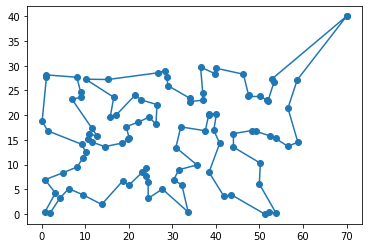

In [2]:
rng = np.random.default_rng(1)


"""
初始化: Monte Carlo法
"""
path = np.arange(N) # 保存路径  0,1,...,101
L = np.inf # 保存最小值答案
for _ in range(10000):
    path0 = np.arange(1, 101)
    rng.shuffle(path0)
    path0 = np.hstack([0, path0, 101]) # 打乱中间的N-2项
    L0 = 0
    for i in range(101):
        L0 += d[path0[i], path0[i+1]] # 求总路程
    if L0 < L: # 更新
        path = path0
        L = L0
print(path, L, sep='\n')


"""
模拟退火
# 注意终止循环的策略
"""
M = 1000 # 没有使状态变化的循环次数上限
alpha = 0.999 # 降温系数
T = 100 # 起始温度
e = 0.1**30 # 终止温度
cnt = 0
while cnt < M:
    uv = rng.integers(1, 101, size=2)
    uv.sort()
    u, v = uv # 生成1,2,...,100中的两个随机数, u < v
    df = (d[path[u-1], path[v]] + d[path[u], path[v+1]]
          - d[path[u-1], path[u]] - d[path[v], path[v+1]])
    if df < 0 or exp(-df/T) >= rng.random(1):
        path[u:v+1] = path[v:u-1:-1]
        L = L + df
        cnt = 0
    T *= alpha # 退火
    if T < e: break # 温度小于终止温度则退出,否则继续
    cnt += 1
print(path, L, sep='\n') # 输出巡航路径及路径长度


xx = xy[path, 0]
yy = xy[path, 1]
plt.plot(xx, yy, '-o')
plt.show()  #画巡航路径

## 遗传算法

![](https://cdn.jsdelivr.net/gh/acryan54/images@main/pic/202208081612159.png)

[  0  61   5  74  63   1  64  44  28  91  14  24  86  83  49   2  33  32
  84  18   4  36  55  51  37  99  71  72  75  69  47  43  97  10  30  59
  56  40  25  50   8  82  85  27 100  20  81  79  21  67  93  90   6  23
  48  39  57  60  58   9  87  45  89  22  42  41   7  11  95  26  13  29
  35  12  54  65  73  62  53  94  16  98  88  96  46  70  15  80  52  17
  19  92  77   3  78  31  68  66  38  34  76 101]
39677.28046287068


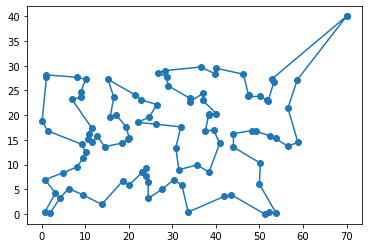

In [3]:
rng = np.random.default_rng(1)


w = 100 # 种群大小
g = 10 # 进化代数
P = [] # 种群染色体矩阵


"""
改良圈算法生成初始种群
"""
for _ in range(w):
    c = np.arange(1, N-1)
    rng.shuffle(c)
    c = np.hstack([0, c, N-1]) # 染色体
    flag = 1
    while flag: # 更新直到不可修改
        flag = 0
        for u in np.arange(1, N-2):
            for v in np.arange(u+1, N-1):
                if d[c[u-1], c[v]] + d[c[u], c[v+1]] < d[c[u-1], c[u]] + d[c[v], c[v+1]]:
                    c[u:v+1] = c[v:u-1:-1]
                    flag = 1
    c[c] = np.arange(N) # 编码
    P.append(c)
P = np.asarray(P) / (N-1) # 归一化


"""
遗传算法：
# 交叉：概率1
# 变异：概率0.1
# 选择：排序保留前w个染色体

# 注意：编码和翻译的方式，翻译用到argsort,所以编码需要c[c] = np.arange(N)
"""
for _ in range(g):
    A = P.copy()
    ord = np.arange(w) # 交叉的两两配对方式
    rng.shuffle(ord)
    pos = rng.integers(1, 100, w)
    for i in np.arange(0, w, 2): # 两两交叉
        A[ord[i], pos[i]:N-1], A[ord[i+1], pos[i]:N-1] = A[ord[i+1], pos[i]:N-1], A[ord[i], pos[i]:N-1]
        
        
    B = A.copy() # 变异
    by = []
    while len(by) < 1:
        by = np.where(rng.random(w) < 0.1)
    B = B[by]
    uvx = rng.integers(1, 101, size=3)
    uvx.sort()
    u, v, x = uvx
    B = np.hstack([B[:, :u], B[:, v+1:w+1], B[:, u:v+1], B[:, w+1:]])
    
    
    G = np.vstack([P, A, B]) 
    ind1 = np.argsort(G, axis=1) # 下标排序，将染色体翻译为0,1,...,101
    NN = G.shape[0]
    LL = np.zeros(NN)
    for i in range(NN):
        for j in range(101):
            LL[i] += d[ind1[i, j], ind1[i, j+1]]
    ind2 = np.argsort(LL)
    P = G[ind2, :][:w, :] # 按适应程度排序选择出子代染色体

path = ind1[ind2[0], :]
L = LL[ind2[0]]
print(path, L, sep='\n') # 输出巡航路径及路径长度


xx = xy[path, 0]
yy = xy[path, 1]
plt.plot(xx, yy, '-o')
plt.show()  #画巡航路径

---

## 参考资料.

- Python数学实验与建模 (司守奎, 孙玺菁)